# Example 2: Fitting 2D data with polynomial
###### Author: Malthe Asmus Marciniak Nielsen

This example shows how to plot 2D data and fit it with a polynomial model. This plots the data in two separate subplots.

## Step 1: Import packages 
We import both the Plotter, Fitter, fitmodels, load_labber_file and os. load_labber_file is required to exstrate the data from Labber files.

In [13]:
from dataanalyzer import Plotter, Fitter, fitmodels, load_labber_file, Valueclass
import os

# Step 2: Load the data
We load the data using os and load_labber_file. If inspect = True in load_labber_file, the parameter names will be automatically printed.

In [14]:
z_drive = r"Z:\Malthe\DataAnalyzer\sample_data"
path = os.path.join(z_drive, "Data_Flux_VNA.hdf5")

[freq, flux], [s21] = load_labber_file(path, insepct=True)

# Sorten flux name
flux.name = "Keith1 (Current)"

# Set S21 to abs and dB
s21 = s21.abs.db

Insepcting Labber File...
File is containing 2 parameters:
	VNA - Frequency
	Keith1 - SMUA Source Value (Current)
File is containing 1 results:
	VNA - S21


# Step 3: Initalize Fiiter
We initialize the Fitter and defines the function for fitting. Then we do the fit.

In [31]:
# Fit the minimum of all individual traces of s21 and find corresponding frequency
func_min = fitmodels.LorentzianModel(negative_peak=True)

# Loop over all traces and fit minimum
freq_min_values = [Fitter(x=freq, y=s21_i, func=func_min).get_extrema() for s21_i in s21]

# Convert to Valueclass
freq_min = Valueclass.fromlisttoone(freq_min_values, name=freq.name, unit="Hz")

In [16]:
# Setting up function
func = fitmodels.PolynomialModel() 

# Initialize fitter
fit = Fitter(x=flux, y=freq_min, func=func)

# Fit data
flux_fit, freq_fit, params, report = fit.do_fit()

# Step 4: Initalize Plotter
We plot the data and the fitted model in two separate subplots.

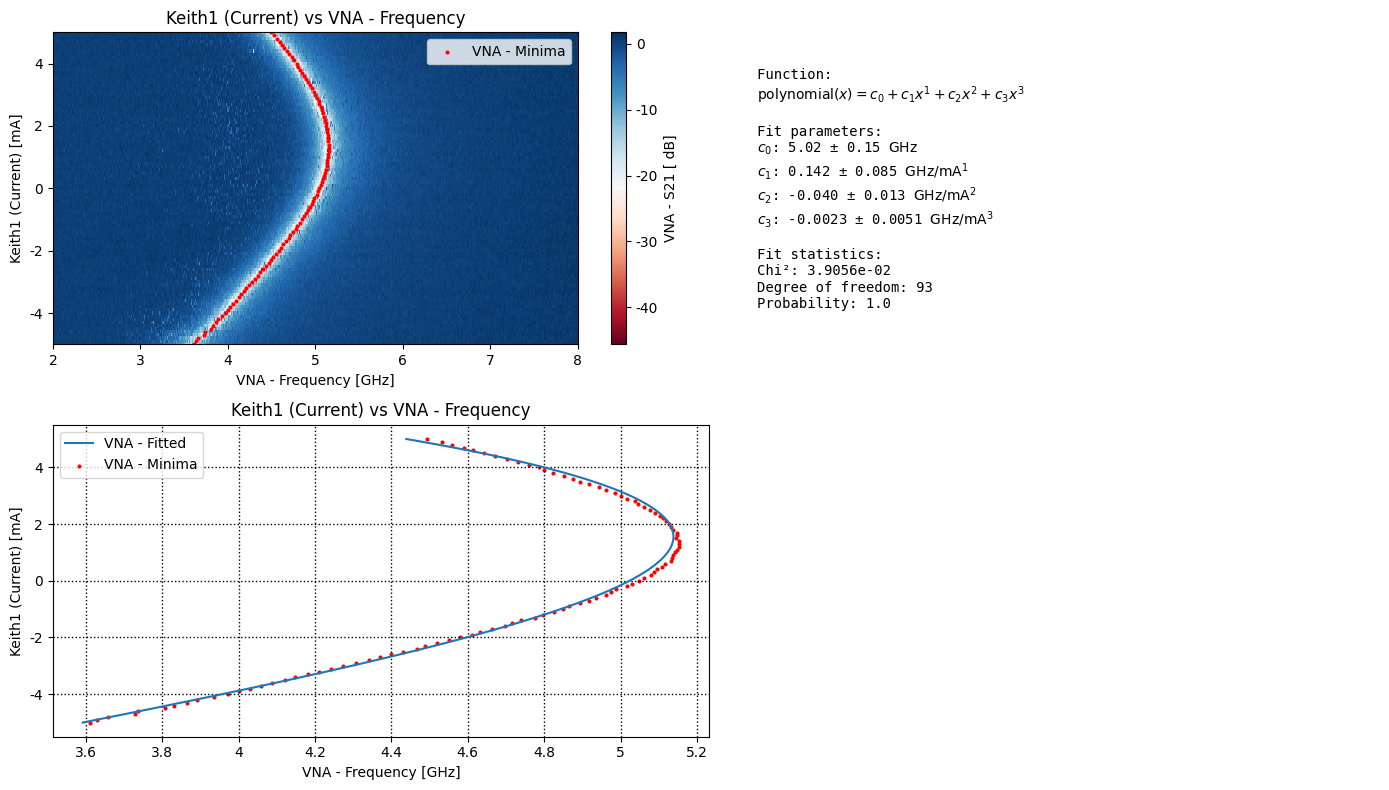

In [32]:
# Initialize plotter
plot = Plotter(subplots=(2, 1))

# Add data (first plot)
plot.heatmap(freq, flux, s21, title="Flux VNA - fitting test")
plot.scatter(freq_min, flux, label="VNA - Minima", s=15, c="r", marker=".")

# Add data and fit (second plot)
plot.plot(x=freq_fit, y=flux_fit, label="VNA - Fitted", ax=(1, 0))
plot.scatter(freq_min, flux, label="VNA - Minima", s=15, c="r", marker=".")

# Add report to plot (metadata)
plot.add_metadata(report, ax=(0, 0))

# Save plot
plot.save("example_polynomial.png")

# Show plot
plot.show()